In [2]:
import geopandas as gpd
import psycopg2  # (if it is postgres/postgis)
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

con = psycopg2.connect(database="postgis-database", user="postgis", password="postgis", host="localhost", port=35432)
sql = "select * from polder3_l1b_bg1 "

data = gpd.read_postgis(sql=sql, con=con)
data.head()


,id,timestamp,lon,lat,oad,geom
0,1,2008-07-01,-0.991605,53.9722,0.7253,"POLYGON ((-0.94590 53.97145, -0.94703 53.96621..."
1,2,2008-07-01,-0.897167,53.9722,0.5933,"POLYGON ((-0.85146 53.97141, -0.85261 53.96617..."
2,3,2008-07-01,-0.802728,53.9722,0.4344,"POLYGON ((-0.75703 53.97138, -0.75819 53.96614..."
3,4,2008-07-01,-0.708290,53.9722,1.5000,"POLYGON ((-0.66259 53.97134, -0.66376 53.96610..."
4,5,2008-07-01,-0.613851,53.9722,0.1738,"POLYGON ((-0.56816 53.97130, -0.56934 53.96607..."


<AxesSubplot:>

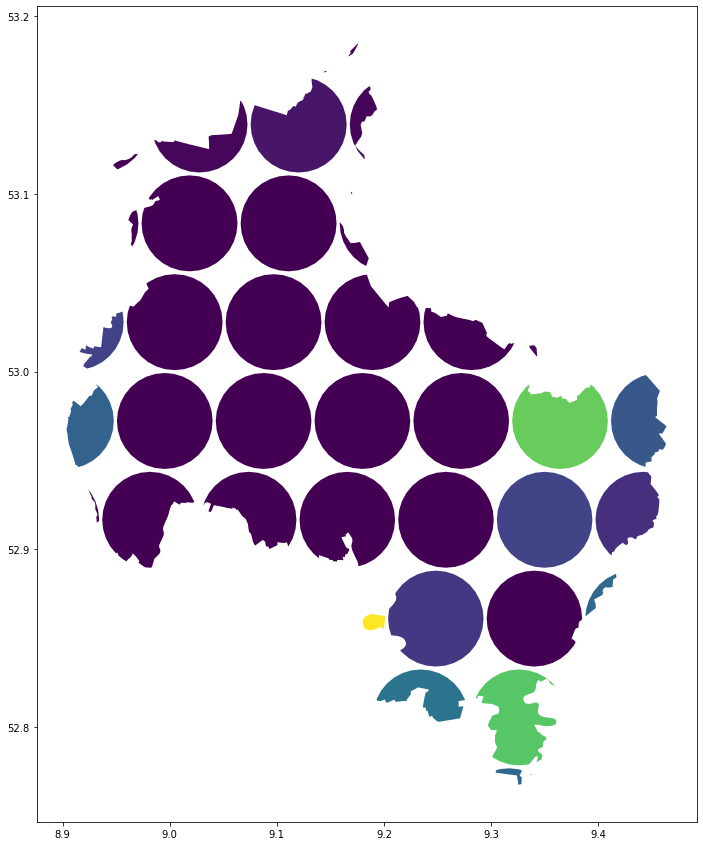

In [18]:
sql="""
    SELECT         
        oad, ST_Intersection(         polder3_l1b_bg1.geom, vg250_krs.geom         )::geometry as geom  
    FROM
        polder3_l1b_bg1,          
        vg250_krs
    WHERE         
    ( gen='Verden' )
    AND
        ST_Intersects(polder3_l1b_bg1.geom, vg250_krs.geom)
"""
oad = gpd.read_postgis(sql=sql, con=con)
con.commit()
oad.plot(column='oad', figsize=(20,15))

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

sql="""
    SELECT 
        geom
    FROM
        vg250_krs
    """
data_background = gpd.read_postgis(sql=sql, con=con)

<AxesSubplot:>

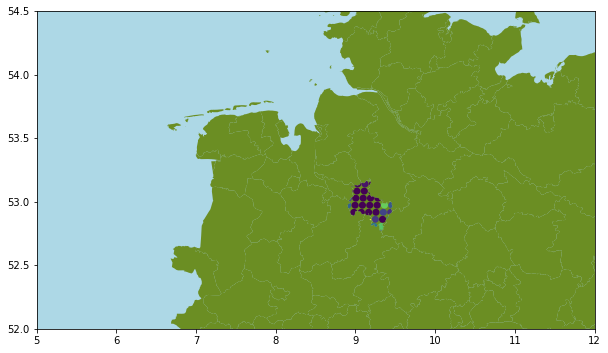

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set_ylim([52, 54.5])
ax.set_xlim([5.0, 12])

ax.set(facecolor = "lightblue") #ocean
ax = oad.plot(column='oad', ax=ax, zorder=2)

data_background.plot(ax=ax, color="olivedrab", zorder=1) #land